In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r"D:\Repositories\PhD\parsed_data\ICE_data\internal_combustion_engine_bearings_fixed_duplicates.csv")

In [3]:
df

,Time,Demand 1,Control 1,Output Drive 1,Channel 1,Channel 2,Channel 3,Channel 4,Channel 1 Kurtosis,Channel 2 Kurtosis,...,Rear Input 5,Rear Input 6,Rear Input 7,Rear Input 8,FAULT,RPM,HUMIDITY%,TEMPERATURE_Celsius,resultant_vibration_magnitude,resultant_vibration_magnitude_normal_dist
0,0.001450,0.125011,0.176033,0.000000,0.211458,0.209182,0.145823,1.624200e-15,2.52457,2.94874,...,0,0,0,0,1,1000,0,-10,0.331264,-1.104839
1,0.006283,0.125011,0.176033,0.000012,0.206329,0.206513,0.150478,1.643320e-15,2.32290,2.46553,...,0,0,0,0,1,1000,0,-10,0.328425,-1.113447
2,0.009633,0.125011,0.172626,0.000013,0.206351,0.194663,0.148313,1.528270e-15,2.26458,2.55488,...,0,0,0,0,1,1000,0,-10,0.320111,-1.139087
3,0.013200,0.125011,0.172626,0.000014,0.214463,0.214489,0.155652,1.791370e-15,2.53380,2.66379,...,0,0,0,0,1,1000,0,-10,0.340921,-1.076103
4,0.016583,0.125011,0.172626,0.000015,0.210449,0.198857,0.154162,1.594310e-15,2.51443,2.81510,...,0,0,0,0,1,1000,0,-10,0.328023,-1.114673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390057,27.302300,0.500044,0.515140,0.043543,0.554265,0.560519,1.633510,1.712510e-15,3.10602,3.09644,...,0,0,0,0,0,2000,50,45,1.813766,0.595405
390058,27.305700,0.500044,0.515140,0.043541,0.554672,0.560996,1.646360,1.711110e-15,3.10423,3.09293,...,0,0,0,0,0,2000,50,45,1.825617,0.601918
390059,27.309200,0.500044,0.515140,0.043536,0.555249,0.561109,1.645410,1.710140e-15,3.11372,3.09118,...,0,0,0,0,0,2000,50,45,1.824971,0.601564
390060,27.312500,0.500044,0.515305,0.043532,0.555029,0.560672,1.640060,1.711640e-15,3.11269,3.09097,...,0,0,0,0,0,2000,50,45,1.819947,0.598807


In [4]:
import sys
import os

src_path = os.path.abspath(r"D:\Repositories\PhD\src\classes")
sys.path.append(src_path)

In [5]:
sys.path

['d:\\Repositories\\PhD\\notebooks\\transfer_learning',
 'd:\\HackoAcademic_Anaconda\\python312.zip',
 'd:\\HackoAcademic_Anaconda\\DLLs',
 'd:\\HackoAcademic_Anaconda\\Lib',
 'd:\\HackoAcademic_Anaconda',
 '',
 'd:\\HackoAcademic_Anaconda\\Lib\\site-packages',
 'd:\\HackoAcademic_Anaconda\\Lib\\site-packages\\win32',
 'd:\\HackoAcademic_Anaconda\\Lib\\site-packages\\win32\\lib',
 'd:\\HackoAcademic_Anaconda\\Lib\\site-packages\\Pythonwin',
 'd:\\HackoAcademic_Anaconda\\Lib\\site-packages\\setuptools\\_vendor',
 'D:\\Repositories\\PhD\\src\\classes']

In [6]:
import lstm
import data_processer

In [7]:
import importlib

importlib.reload(lstm)
importlib.reload(data_processer)

<module 'data_processer' from 'D:\\Repositories\\PhD\\src\\classes\\data_processer.py'>

In [8]:
dp = data_processer.DataProcesser()

In [10]:
train_loader, val_loader, test_loader, scaler = dp.prepare_autoregressive_data(df['resultant_vibration_magnitude_normal_dist'])

In [9]:
X = dp.prepare_tensor_for_lstm(df['resultant_vibration_magnitude_normal_dist'], 10)

In [10]:
X.to("cpu")
X

tensor([[[-1.1048],
         [-1.1134],
         [-1.1391],
         ...,
         [-1.1274],
         [-1.1188],
         [-1.1299]],

        [[-1.1134],
         [-1.1391],
         [-1.0761],
         ...,
         [-1.1188],
         [-1.1299],
         [-1.1389]],

        [[-1.1391],
         [-1.0761],
         [-1.1147],
         ...,
         [-1.1299],
         [-1.1389],
         [-1.0839]],

        ...,

        [[ 0.5602],
         [ 0.5732],
         [ 0.5830],
         ...,
         [ 0.5954],
         [ 0.6019],
         [ 0.6016]],

        [[ 0.5732],
         [ 0.5830],
         [ 0.5866],
         ...,
         [ 0.6019],
         [ 0.6016],
         [ 0.5988]],

        [[ 0.5830],
         [ 0.5866],
         [ 0.5944],
         ...,
         [ 0.6016],
         [ 0.5988],
         [ 0.5950]]])

In [11]:
lstm_net = lstm.LSTMModel(1, 128, 3, 1, device="cpu")

In [12]:
lstm_net.load_model(r"D:\Repositories\PhD\models\healthy_lstm.pth")

Model successfully loaded from 'D:\Repositories\PhD\models\healthy_lstm.pth'


D:\Repositories\PhD\src\classes\lstm.py:144: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(file_path, map_location=self.device))


True

In [21]:
X.shape

torch.Size([390053, 10, 1])

In [ ]:
22,691,738,424

In [13]:
X_feat = lstm_net.extract_features(X)

In [14]:
X_feat.shape

(390053, 128)

In [16]:
pd.DataFrame(X_feat).to_csv(r"D:\Repositories\PhD\parsed_data\ICE_data\extracted_features.csv", index = False)

# Features extracted

# Tests with extracted features:

In [18]:
from sklearn.model_selection import train_test_split

In [17]:
y = df.iloc[:-9, -6]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_feat, df.iloc[:-9, -6].values, random_state=42, shuffle = True)

In [ ]:
total_samples = df.shape[0]
train_end = int(0.7 * total_samples)

In [26]:
y_train = df.loc[:train_end, 'FAULT']

In [66]:
y_test = df.loc[train_end+1:, 'FAULT']

In [67]:
X_train[0]

array([ 6.7498512e-03, -2.3554699e-07,  7.6034482e-08, -2.4467900e-08,
        5.2412691e-08,  4.4487134e-08, -3.8371579e-07, -6.3911521e-08,
        1.2736035e-07, -6.2367313e-08, -7.0231589e-09, -5.2473001e-07,
       -6.3041568e-08, -3.2401808e-02, -3.8925254e-08, -1.0368821e-08,
        7.8229291e-08,  2.1073465e-07,  8.2166514e-07,  2.1618977e-08,
       -1.1231175e-08,  2.3490447e-08,  1.0800392e-04,  2.7466388e-07,
        5.0238704e-08,  5.6044801e-06,  7.8777887e-08,  3.3435101e-06,
       -2.4268863e-07, -5.0260223e-09, -9.7473132e-09, -1.6961232e-08,
        1.9211386e-07,  8.9193827e-06, -1.5792012e-02, -5.9024012e-07,
        4.0914099e-09, -2.7103148e-08, -4.9780049e-08,  4.5473499e-08,
        6.4737997e-09,  9.9395919e-08,  2.5960830e-07,  4.1633748e-06,
        2.1855688e-07,  1.4736098e-07,  2.6168996e-06,  3.8699604e-09,
        4.8213762e-09,  7.8835200e-08,  2.1047734e-08, -5.2346280e-07,
        4.8162313e-08, -1.0486902e-07,  1.8195136e-08,  9.8084320e-07,
      

In [38]:
from xgboost import XGBClassifier

In [39]:
xgbc = XGBClassifier()

In [70]:
y_train = y_train.values.reshape(-1, 1)

In [73]:
y_train[:-8].shape

(273036, 1)

In [72]:
X_train.shape

(273036, 128)

In [40]:
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [47]:
y_train_pred = xgbc.predict_proba(X_train)[:, 1]
y_test_pred = xgbc.predict_proba(X_test)[:, 1]

In [48]:
y_train_pred

array([0.4028711 , 0.4398954 , 0.64253557, ..., 0.67282677, 0.672593  ,
       0.5960434 ], dtype=float32)

In [42]:
y_train.shape

(292539,)

In [43]:
y_test.shape

(97514,)

In [44]:
y_test_pred.shape 

(97514,)

In [42]:
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, accuracy_score, recall_score, precision_score

In [87]:
def print_scores(y_true, y_pred):
    print(f"F1: {f1_score(y_true, y_pred):.3f}")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.3f}")
    print(f"Precision: {precision_score(y_true, y_pred):.3f}")
    print(f"ROC AUC: {roc_auc_score(y_true, y_pred):.3f}")
    print(f"Recall: {recall_score(y_true, y_pred):.3f}")

In [51]:
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
fpr_test, tpr_test, thrs = roc_curve(y_test, y_test_pred)

In [52]:
import matplotlib.pyplot as plt

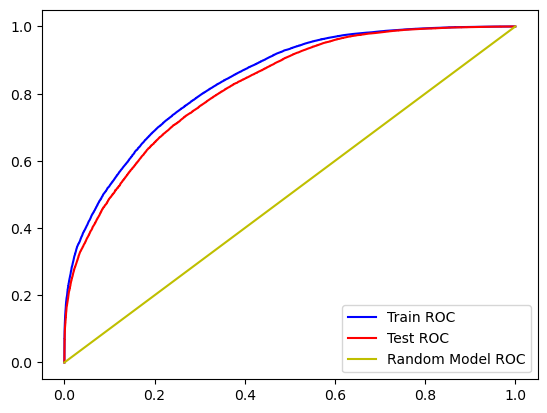

In [56]:
plt.plot(fpr_train, tpr_train, color = 'b', label = 'Train ROC')
plt.plot(fpr_test, tpr_test, color = 'r', label = 'Test ROC')
plt.plot(fpr_train, fpr_train, color = 'y', label = 'Random Model ROC')
plt.legend()

In [57]:
# Find the best threshold (maximize Youden’s J statistic)
j_scores = tpr_test - fpr_test  # Compute J = TPR - FPR
best_index = np.argmax(j_scores)  # Index of best threshold
best_threshold = thrs[best_index]

In [58]:
best_threshold

0.5454965

In [60]:
print_scores(y_test, np.where(y_test_pred > best_threshold, 1, 0))

F1: 0.746050441435566
Accuracy: 0.7324589289743011
Precision: 0.7588514851485149
ROC AUC: 0.7323656451824653
Recall: 0.7336741140658205


# Tests with extracted features + additional features:

In [20]:
X_feat.shape

(390053, 128)

In [53]:
df.loc[:390052, ['Demand 1', 'Control 1', 'Output Drive 1', 'Channel 1 Kurtosis', 'Channel 2 Kurtosis', 'Channel 2 Kurtosis', 'Channel 3 Kurtosis', 'Rear Input 1', 'Rear Input 2', 'Rear Input 3', 'Rear Input 4', 'Rear Input 5', 'Rear Input 6', 'Rear Input 7', 'Rear Input 8']]

,Demand 1,Control 1,Output Drive 1,Channel 1 Kurtosis,Channel 2 Kurtosis,Channel 2 Kurtosis,Channel 3 Kurtosis,Rear Input 1,Rear Input 2,Rear Input 3,Rear Input 4,Rear Input 5,Rear Input 6,Rear Input 7,Rear Input 8
0,0.125011,0.176033,0.000000,2.52457,2.94874,2.94874,1.83760,0,0,0,0,0,0,0,0
1,0.125011,0.176033,0.000012,2.32290,2.46553,2.46553,1.76090,0,0,0,0,0,0,0,0
2,0.125011,0.172626,0.000013,2.26458,2.55488,2.55488,1.79255,0,0,0,0,0,0,0,0
3,0.125011,0.172626,0.000014,2.53380,2.66379,2.66379,1.78517,0,0,0,0,0,0,0,0
4,0.125011,0.172626,0.000015,2.51443,2.81510,2.81510,1.73145,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390048,0.500044,0.515046,0.043557,3.08234,3.06971,3.06971,2.86300,0,0,0,0,0,0,0,0
390049,0.500044,0.515046,0.043557,3.08509,3.07475,3.07475,2.87409,0,0,0,0,0,0,0,0
390050,0.500044,0.515021,0.043557,3.08399,3.07438,3.07438,2.87398,0,0,0,0,0,0,0,0
390051,0.500044,0.515021,0.043556,3.08722,3.07377,3.07377,2.90767,0,0,0,0,0,0,0,0


In [56]:
X_additional = df.loc[:390052, ['Demand 1', 'Control 1', 'Output Drive 1', 'Channel 1 Kurtosis', 'Channel 2 Kurtosis', 'Channel 2 Kurtosis', 'Channel 3 Kurtosis', 'Rear Input 1', 'Rear Input 2', 'Rear Input 3', 'Rear Input 4', 'Rear Input 5', 'Rear Input 6', 'Rear Input 7', 'Rear Input 8']]

In [57]:
X = np.hstack((X_feat, X_additional))

In [58]:
from sklearn.model_selection import train_test_split

def split_data(X, y, test_size = 0.25, random_state = 42, shuffle = True):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=random_state, shuffle=shuffle)

    return X_train, X_test, y_train, y_test

In [59]:
X

array([[ 2.67289393e-03, -5.73524446e-08,  3.67313504e-08, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.59939302e-03, -5.67548319e-08,  3.63764343e-08, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.08368355e-03, -5.49865007e-08,  3.72019890e-08, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.67011991e-01, -5.07872164e-06,  7.80347591e-07, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.66021585e-01, -5.03454339e-06,  7.74796888e-07, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.64800644e-01, -5.00134593e-06,  7.71772136e-07, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [60]:
X_train, X_test, y_train, y_test = split_data(X, y.values)

In [61]:
from xgboost import XGBClassifier

In [62]:
xgbc = XGBClassifier()

In [63]:
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [73]:
y_train_pred = xgbc.predict_proba(X_train)[:, 1]
y_test_pred = xgbc.predict_proba(X_test)[:, 1]

In [74]:
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
fpr_test, tpr_test, thrs = roc_curve(y_test, y_test_pred)

In [75]:
import matplotlib.pyplot as plt

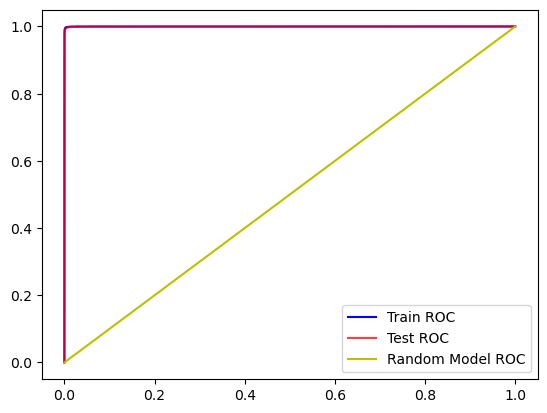

In [76]:
plt.plot(fpr_train, tpr_train, color = 'b', label = 'Train ROC')
plt.plot(fpr_test, tpr_test, alpha = 0.75, color = 'r', label = 'Test ROC')
plt.plot(fpr_train, fpr_train, color = 'y', label = 'Random Model ROC')
plt.legend()

In [77]:
# Find the best threshold (maximize Youden’s J statistic)
j_scores = tpr_test - fpr_test  # Compute J = TPR - FPR
best_index = np.argmax(j_scores)  # Index of best threshold
best_threshold = thrs[best_index]

In [83]:
best_threshold

0.57383007

In [84]:
y_test_pred

array([9.9987531e-01, 9.9996161e-01, 3.3241522e-02, ..., 9.9948835e-01,
       1.0594622e-05, 8.0843829e-03], dtype=float32)

Text(0.5, 1.0, 'Predicted probability distribution')

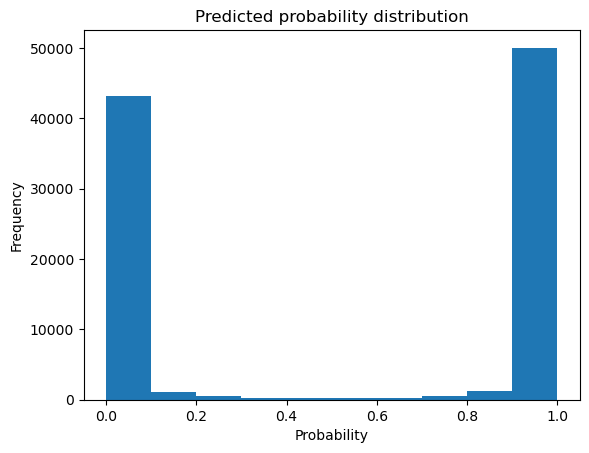

In [86]:
plt.hist(y_test_pred)
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.title("Predicted probability distribution")

In [88]:
print_scores(y_test, np.where(y_test_pred > best_threshold, 1, 0))

F1: 0.996
Accuracy: 0.995
Precision: 0.997
ROC AUC: 0.995
Recall: 0.994


In [82]:
y_test

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [97]:
importance_df = pd.DataFrame(data = {'column' : ['Demand 1', 'Control 1', 'Output Drive 1', 'Channel 1 Kurtosis', 'Channel 2 Kurtosis', 'Channel 2 Kurtosis', 'Channel 3 Kurtosis', 'Rear Input 1', 'Rear Input 2', 'Rear Input 3', 'Rear Input 4', 'Rear Input 5', 'Rear Input 6', 'Rear Input 7', 'Rear Input 8'], 'importance' : xgbc.feature_importances_[-len(['Demand 1', 'Control 1', 'Output Drive 1', 'Channel 1 Kurtosis', 'Channel 2 Kurtosis', 'Channel 2 Kurtosis', 'Channel 3 Kurtosis', 'Rear Input 1', 'Rear Input 2', 'Rear Input 3', 'Rear Input 4', 'Rear Input 5', 'Rear Input 6', 'Rear Input 7', 'Rear Input 8']):]})

In [98]:
importance_df

,column,importance
0,Demand 1,0.079693
1,Control 1,0.022313
2,Output Drive 1,0.034152
3,Channel 1 Kurtosis,0.004181
4,Channel 2 Kurtosis,0.008275
5,Channel 2 Kurtosis,0.000000
6,Channel 3 Kurtosis,0.006883
7,Rear Input 1,0.000000
8,Rear Input 2,0.000000
9,Rear Input 3,0.000000
